In [262]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import graphviz
from sklearn.metrics import mean_squared_error
import pydotplus

1. Przygotwanie danych

In [263]:
data = datasets.load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(data['data'][['mean texture', 'mean symmetry']], data["target"], test_size=0.2)

2. Dobór głębokości

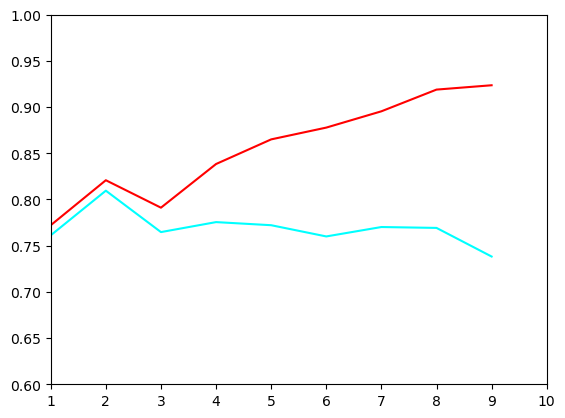

In [264]:
array_train = np.array(0)
array_test = np.array(0)
for i in range(1, 10):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train, y_train)

    y_pred_train = tree_clf.predict(X_train)
    y_pred_test = tree_clf.predict(X_test)

    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)

    array_train = np.append(array_train, train_f1)
    array_test = np.append(array_test, test_f1)


plt.plot(array_train, color='red', label="Train f1")
plt.plot(array_test, color='cyan', label="Test f1")
plt.xlim([1, 10])
plt.ylim([0.6, 1])

plt.show()

max_depth = 3

3. Klasyfikacja

In [265]:
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_clf.fit(X_train, y_train)

y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)
train_acc = tree_clf.score(X_train, y_train)
test_acc = tree_clf.score(X_test, y_test)

array = [max_depth, train_f1, test_f1, train_acc, test_acc]
with open("f1acc_tree.pkl", 'wb') as f:
    pickle.dump(array, f)

In [266]:
dot_data = export_graphviz(tree_clf, out_file=None, rounded=True, filled=True, feature_names=['mean texture', 'mean symmetry'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('bc.png')

True

4. Regresja

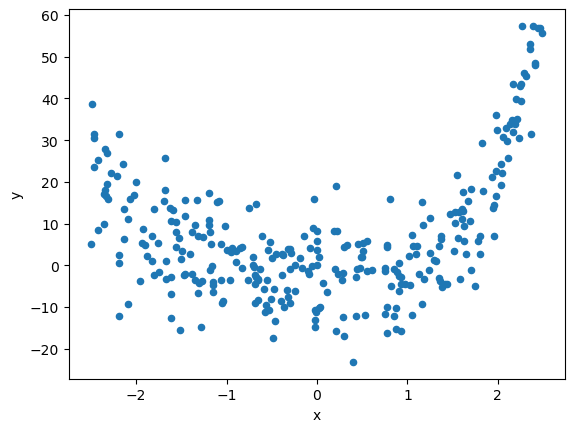

In [267]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

X_train, X_test, y_train, y_test = train_test_split(df["x"], df["y"], test_size=0.2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

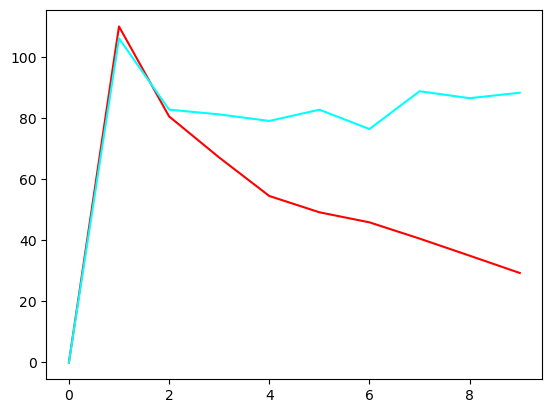

In [268]:
array_train = np.array(0)
array_test = np.array(0)


for i in range(1, 10):
    tree_reg = DecisionTreeRegressor(max_depth=i)
    tree_reg.fit(X_train, y_train)

    y_pred_train = tree_reg.predict(X_train)
    y_pred_test = tree_reg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    array_train = np.append(array_train, train_mse)
    array_test = np.append(array_test, test_mse)


plt.plot(array_train, color='red', label="Train mse")
plt.plot(array_test, color='cyan', label="Test mse")

In [269]:
max_depth = 4

tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_train, y_train)

y_pred_train = tree_reg.predict(X_train)
y_pred_test = tree_reg.predict(X_test)

train_f1 = mean_squared_error(y_train, y_pred_train)
test_f1 = mean_squared_error(y_test, y_pred_test)

array = [max_depth, train_f1, test_f1]
with open("mse_tree.pkl", 'wb') as f:
    pickle.dump(array, f)

In [270]:
dot_data = export_graphviz(tree_reg, out_file=None, rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('reg.png')

True

5. Porównanie regresji

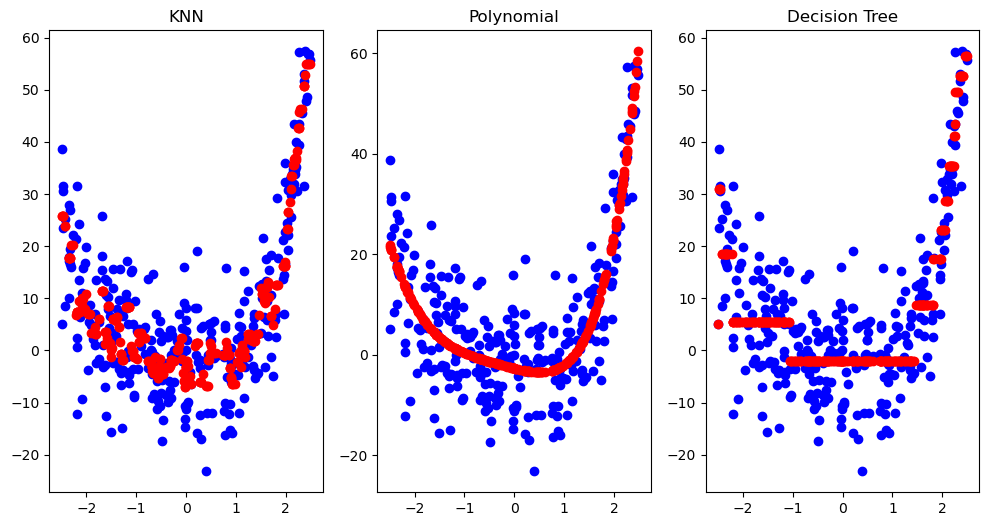

In [271]:
from sklearn.neighbors import KNeighborsRegressor
knn_5_reg = KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train, y_train)
yknn_pred = knn_5_reg.predict(X.reshape(-1, 1))

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly5_feat = PolynomialFeatures(degree=5)
X_poly5 = poly5_feat.fit_transform(X_train)

lin2 = LinearRegression()
lin2.fit(X_poly5, y_train)
y2poly_pred = lin2.predict(poly5_feat.fit_transform(X.reshape(-1, 1)))

ytree_pred = tree_reg.predict(X.reshape(-1, 1))


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 6))

ax0.set_title("KNN")
ax0.scatter(X, y, color='blue')
ax0.scatter(X, yknn_pred, color='red')

ax1.set_title("Polynomial")
ax1.scatter(X, y, color='blue')
ax1.scatter(X, y2poly_pred, color='red')

ax2.set_title("Decision Tree")
ax2.scatter(X, y, color='blue')
ax2.scatter(X, ytree_pred, color='red')
plt.show()